In [ ]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
labels_new = [labels[i] for i in range(100) if i%2 != 0]

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

train_mask = y_train % 2 != 0
X_train = X_train[train_mask]
y_train = y_train[train_mask]
y_train = (y_train - 1) // 2

test_mask = y_test % 2 != 0
X_test = X_test[test_mask]
y_test = y_test[test_mask]
y_test = (y_test - 1) // 2

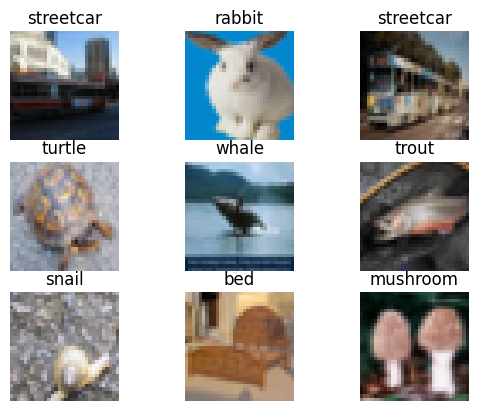

In [ ]:
for i in np.arange(9):
  random_index = np.random.randint(0, len(y_train))
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[random_index])
  plt.title(labels_new[y_train[random_index]])
  plt.axis('off')

In [ ]:
y_train_one_hot = tf.one_hot(y_train, 50, on_value = 1.0, off_value = 0.0, axis =-1)

In [ ]:
y_test_one_hot = tf.one_hot(y_test, 50, on_value = 1.0, off_value = 0.0, axis =-1)

In [ ]:
X_train = np.float32(X_train)/255.0
X_test = np.float32(X_test)/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
  Conv2D(64, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
  BatchNormalization(),

  Conv2D(64, 3, activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.3),

  Conv2D(128, 3, activation='relu', padding='same'),
  BatchNormalization(),

  Conv2D(128, 3, activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.4),

  Conv2D(256, 3, activation='relu', padding='same'),
  BatchNormalization(),

  Conv2D(256, 3, activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.5),

  Flatten(),

  Dense(512, activation='relu'),
  BatchNormalization(),
  Dropout(0.6),

  Dense(50, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
# Data Augmentation
# ReduceLRonPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

batch_size = 64

In [ ]:
history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
          steps_per_epoch=len(X_train) // batch_size,
          epochs=50,
          validation_data=(X_test, y_test_one_hot),
          callbacks=[reduce_lr])

Epoch 1/50
390/390 [==============================] - 26s 42ms/step - loss: 3.8385 - accuracy: 0.1288 - val_loss: 3.5721 - val_accuracy: 0.0938 - lr: 0.0010
Epoch 2/50
390/390 [==============================] - 13s 33ms/step - loss: 3.0345 - accuracy: 0.2296 - val_loss: 2.4673 - val_accuracy: 0.3330 - lr: 0.0010
Epoch 3/50
390/390 [==============================] - 13s 33ms/step - loss: 2.6610 - accuracy: 0.2984 - val_loss: 2.3123 - val_accuracy: 0.3864 - lr: 0.0010
Epoch 4/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3740 - accuracy: 0.3555 - val_loss: 2.1440 - val_accuracy: 0.4204 - lr: 0.0010
Epoch 5/50
390/390 [==============================] - 13s 33ms/step - loss: 2.1684 - accuracy: 0.4001 - val_loss: 1.9282 - val_accuracy: 0.4594 - lr: 0.0010
Epoch 6/50
390/390 [==============================] - 13s 33ms/step - loss: 2.0230 - accuracy: 0.4324 - val_loss: 1.7739 - val_accuracy: 0.5048 - lr: 0.0010
Epoch 7/50
390/390 [==============================] - 13s 

In [ ]:
model.evaluate(x=X_test, y=y_test_one_hot)

157/157 [==============================] - 0s 3ms/step - loss: 0.9874 - accuracy: 0.7272


[0.9874142408370972, 0.7271999716758728]

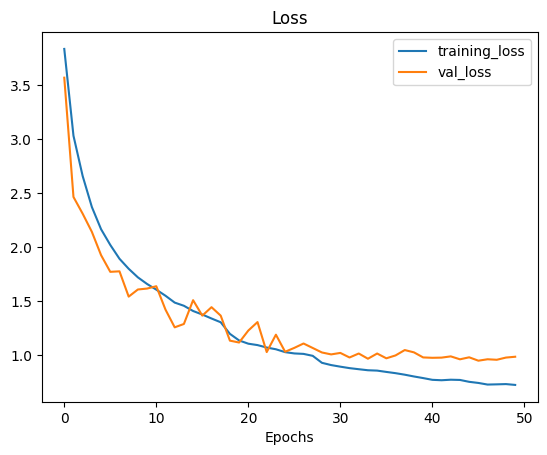

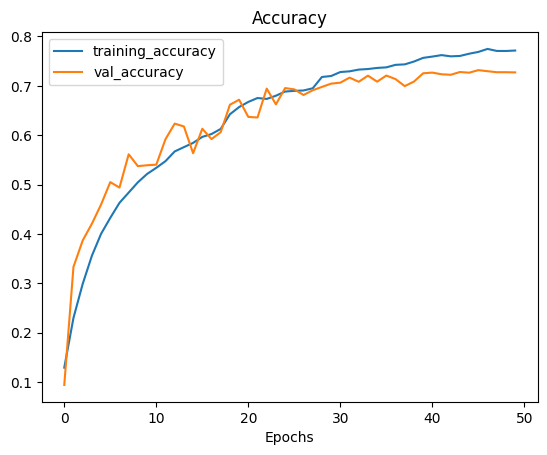

In [ ]:
def plot_loss_accuracy_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_accuracy_curves(history)

In [ ]:
pred_probs = model.predict(X_test)
print(pred_probs)

157/157 [==============================] - 1s 2ms/step
[[1.7031856e-05 8.2005076e-03 6.5032631e-04 ... 2.4661487e-01
  3.2723425e-03 3.0871949e-03]
 [4.2649430e-07 5.4332540e-05 5.2732339e-06 ... 1.4183171e-07
  1.1784800e-05 4.4800754e-06]
 [3.3128327e-07 5.4385041e-06 1.1156255e-07 ... 2.6866644e-07
  3.7854113e-06 7.8940284e-06]
 ...
 [2.1702395e-05 1.4875485e-06 5.1935024e-07 ... 1.9589864e-02
  5.4865050e-05 8.3444305e-05]
 [1.9289512e-06 2.9756498e-08 1.0394627e-09 ... 2.3769603e-08
  2.2661772e-09 3.4314271e-05]
 [2.9166078e-08 7.5284634e-10 1.1236367e-10 ... 1.1032710e-09
  2.0336403e-08 1.8081364e-04]]


In [ ]:
preds = pred_probs.argmax(axis=-1)
print(preds)

[24 16 25 ... 13 41 25]


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]


  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)


  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
make_confusion_matrix(y_true=y_test,
                     y_pred=preds,
                     classes=labels_new,
                     figsize=(100,100),
                     text_size=20
                     )

In [ ]:
cr_true = [labels_new[x] for x in y_test]
cr_preds = [labels_new[i] for i in preds]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=cr_true,
                            y_pred=cr_preds))

               precision    recall  f1-score   support

aquarium_fish       0.87      0.84      0.85       100
         bear       0.59      0.47      0.52       100
          bed       0.69      0.75      0.72       100
       beetle       0.71      0.86      0.78       100
       bottle       0.86      0.75      0.80       100
          boy       0.68      0.60      0.64       100
          bus       0.66      0.71      0.68       100
        camel       0.69      0.65      0.67       100
       castle       0.89      0.78      0.83       100
       cattle       0.57      0.62      0.59       100
   chimpanzee       0.84      0.82      0.83       100
        cloud       0.91      0.78      0.84       100
        couch       0.66      0.55      0.60       100
    crocodile       0.57      0.57      0.57       100
     dinosaur       0.64      0.64      0.64       100
     elephant       0.83      0.52      0.64       100
       forest       0.68      0.72      0.70       100
         